# 1. NLTK 패키지

In [1]:
import nltk

In [6]:
# d:/kks/IDE/nltk_data
# book만 받음
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml
showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [7]:
from nltk.book import *

*** Introductory Examples for the NLTK Book ***
Loading text1, ..., text9 and sent1, ..., sent9
Type the name of the text or sentence to view it.
Type: 'texts()' or 'sents()' to list the materials.
text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908


In [9]:
emma = nltk.corpus.gutenberg.raw('austen-emma.txt')
len(emma)

887071

In [12]:
# sent_tokenize() : 문장 단위로 쪼개기
# list로 반환
from nltk.tokenize import sent_tokenize
sent_tokens = sent_tokenize(emma)
print('문장 수 : ',len(sent_tokens))
print('10번째 문장 :', sent_tokens[10])

문장 수 :  7493
10번째 문장 : It was on the wedding-day
of this beloved friend that Emma first sat in mournful thought
of any continuance.


In [13]:
# word_tokenize() : 단어 단위로 쪼개기 
# list로 반환
from nltk.tokenize import word_tokenize
word_tokenize(sent_tokens[10])


['It',
 'was',
 'on',
 'the',
 'wedding-day',
 'of',
 'this',
 'beloved',
 'friend',
 'that',
 'Emma',
 'first',
 'sat',
 'in',
 'mournful',
 'thought',
 'of',
 'any',
 'continuance',
 '.']

In [18]:
# 토큰화 할 때 정규표현식 이용가능 : RegexpTokenizer 클래스
from nltk.tokenize import RegexpTokenizer
ret = RegexpTokenizer('[\w]+')
print(ret.tokenize(sent_tokens[10]))

['It', 'was', 'on', 'the', 'wedding', 'day', 'of', 'this', 'beloved', 'friend', 'that', 'Emma', 'first', 'sat', 'in', 'mournful', 'thought', 'of', 'any', 'continuance']


# 2. 형태소(의미를 가진 가장 작은 단위) 분석
- 어간 추출(stemming)
- 원형 복원(lemmatizing)
- 품사 태깅(part of Speech Tagging)

In [20]:
words = ['sending','cooking','fils','lives','crying','dying']

In [23]:
# 어간 추출 (1) : PorterStemmer
from nltk.stem import PorterStemmer
pst = PorterStemmer()
pst.stem(words[1]) # list를 넣으면 에러.
# 리스트 컴프리헨션을 사용
[pst.stem(word) for word in words]

['send', 'cook', 'fil', 'live', 'cri', 'die']

In [24]:
# 어간 추출 (2) : LancasterStemmer
from nltk.stem import LancasterStemmer
lst = LancasterStemmer()
[lst.stem(word) for word in words]

['send', 'cook', 'fil', 'liv', 'cry', 'dying']

In [25]:
# 어간 추출 (3) : RegexpStemmer
from nltk.stem import RegexpStemmer
rst = RegexpStemmer('ing')
[rst.stem(word) for word in words]

['send', 'cook', 'fils', 'lives', 'cry', 'dy']

In [27]:
# 어간 추출을 하면 의미가 달라질 수 있어 원형복원을 한다.
words2 = ['belives','cooking']
[lst.stem(word)for word in words2]

['bel', 'cook']

In [29]:
# 원형복원
from nltk.stem.wordnet import WordNetLemmatizer
wl = WordNetLemmatizer()
[wl.lemmatize(word) for word in words2]

['belives', 'cooking']

In [31]:
# 품사 태깅
from nltk.tag import pos_tag
tagged_list = pos_tag(word_tokenize(sent_tokens[10]))
print('품사 태깅 전 : ',word_tokenize(sent_tokens[10]))
print('품사 태깅 후 : ',tagged_list)

품사 태깅 전 :  ['It', 'was', 'on', 'the', 'wedding-day', 'of', 'this', 'beloved', 'friend', 'that', 'Emma', 'first', 'sat', 'in', 'mournful', 'thought', 'of', 'any', 'continuance', '.']
품사 태깅 후 :  [('It', 'PRP'), ('was', 'VBD'), ('on', 'IN'), ('the', 'DT'), ('wedding-day', 'NN'), ('of', 'IN'), ('this', 'DT'), ('beloved', 'VBN'), ('friend', 'NN'), ('that', 'WDT'), ('Emma', 'NNP'), ('first', 'RB'), ('sat', 'VBD'), ('in', 'IN'), ('mournful', 'JJ'), ('thought', 'NN'), ('of', 'IN'), ('any', 'DT'), ('continuance', 'NN'), ('.', '.')]


## 퀴즈 : emma 소설에서
<pre>
    1. 특수문자가 들어가지 않은 3글자 이상의 단어만 추출해서 품사태깅 하시오.
    2. Emma 단어의 품사태깅이 어떤 품사들로 되어있는지 모두 출력하시오.
    3. 내가 원하는 품사(명사)의 단어만 뽑아 등장하는 명사의 종류 개수를 출력.
</pre>

In [40]:
# 1.
ret = RegexpTokenizer('[\w]{3,}')
overlen_3 = ret.tokenize(emma)
tagged_list = pos_tag(overlen_3)

[('Emma', 'NNP'),
 ('Jane', 'NNP'),
 ('Austen', 'NNP'),
 ('1816', 'CD'),
 ('VOLUME', 'NNP'),
 ('CHAPTER', 'NNP'),
 ('Emma', 'NNP'),
 ('Woodhouse', 'NNP'),
 ('handsome', 'VBD'),
 ('clever', 'NN'),
 ('and', 'CC'),
 ('rich', 'JJ'),
 ('with', 'IN'),
 ('comfortable', 'JJ'),
 ('home', 'NN'),
 ('and', 'CC'),
 ('happy', 'JJ'),
 ('disposition', 'NN'),
 ('seemed', 'VBD'),
 ('unite', 'JJ'),
 ('some', 'DT'),
 ('the', 'DT'),
 ('best', 'JJS'),
 ('blessings', 'NNS'),
 ('existence', 'NN'),
 ('and', 'CC'),
 ('had', 'VBD'),
 ('lived', 'VBN'),
 ('nearly', 'RB'),
 ('twenty', 'JJ'),
 ('one', 'CD'),
 ('years', 'NNS'),
 ('the', 'DT'),
 ('world', 'NN'),
 ('with', 'IN'),
 ('very', 'RB'),
 ('little', 'JJ'),
 ('distress', 'NN'),
 ('vex', 'IN'),
 ('her', 'PRP$'),
 ('She', 'PRP'),
 ('was', 'VBD'),
 ('the', 'DT'),
 ('youngest', 'JJS'),
 ('the', 'DT'),
 ('two', 'CD'),
 ('daughters', 'NNS'),
 ('most', 'RBS'),
 ('affectionate', 'JJ'),
 ('indulgent', 'NN'),
 ('father', 'NN'),
 ('and', 'CC'),
 ('had', 'VBD'),
 ('consequ

In [53]:
# 2.
pos = set()
cnt = 0
for emma_t in tagged_list:
    if emma_t[0] == 'Emma':
        cnt += 1
        pos.add(emma_t[1])
print(cnt)
print(pos)

865
{'NN', 'VBN', 'NNP', 'VB', 'JJ', 'VBP', 'VBD', 'NNS', 'RB', 'NNPS'}


In [58]:
# count 빌드업
import pandas as pd
pos_cnt = pd.Series([0]*len(pos),index=list(pos))
for emma_t in tagged_list:
    if emma_t[0]=='Emma':
        pos_cnt[emma_t[1]] +=1
pos_cnt

NN        7
VBN       1
NNP     838
VB        5
JJ        4
VBP       4
VBD       1
NNS       2
RB        1
NNPS      2
dtype: int64

In [61]:
# 3.
nouns_list = [emma_t[0]for emma_t in tagged_list if emma_t[1]=='NN']
print('명사가 나온 횟수 : ',len(nouns_list))
print('나오는 명사 개수 : ',len(set(nouns_list)))

명사가 나온 횟수 :  18554
나오는 명사 개수 :  2738


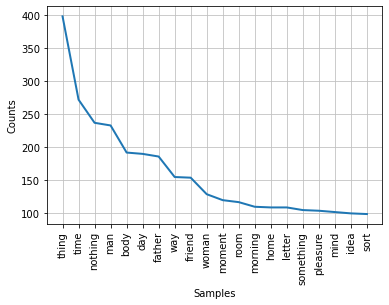

In [71]:
## 전체 단어 사용 빈도수
from nltk import Text
noun_text = Text(nouns_list)
noun_text.plot(20)

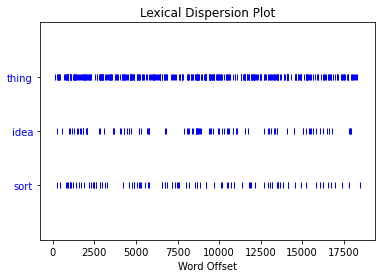

In [72]:
noun_text.dispersion_plot(['thing','idea','sort'])

In [73]:
# 고유명사 출현 빈도수
nnp_list = [emma_t[0]for emma_t in tagged_list if emma_t[1]=='NNP']
print('명사가 나온 횟수 : ',len(nnp_list))
print('나오는 명사 개수 : ',len(set(nnp_list)))

명사가 나온 횟수 :  8608
나오는 명사 개수 :  642


In [74]:
from nltk import FreqDist
FreqDist(nnp_list)

FreqDist({'Emma': 838, 'Mrs': 696, 'Miss': 569, 'Harriet': 483, 'Weston': 433, 'Knightley': 389, 'Elton': 382, 'Jane': 295, 'Woodhouse': 293, 'Fairfax': 241, ...})